In [104]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

1 - Generate 200 data samples (X,Y) with make_blobs or make_moons using a noise value of 0.20 and display it with scatter (a dark background gives a better rendering)

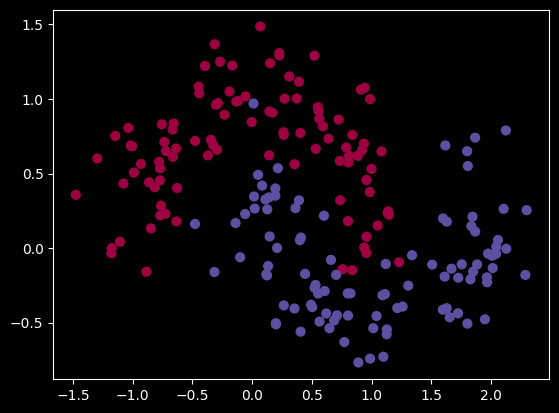

In [105]:
np.random.seed(3)

# Create data samples with make_blobs
# X,Y = datasets.make_blobs(n_samples=200, centers=2, cluster_std=2, random_state=42)

# Create data samples with make_moons
X,Y = datasets.make_moons(n_samples=200, noise=0.20, random_state=42)

plt.style.use('dark_background')
plt.scatter(X[:,0],X[:,1],s=40,c=Y,cmap=plt.cm.Spectral)

2 - Build dataset by concatenating input vectors (X=[x1j,x2j]) and output labels (Y=[yj]) to define samples by a single vector [x1j,x2j,yj]

In [106]:
# Create dataset by concatenating input vectors and output labels => [x_1j,x_2j,y_j]
print(X.shape)  # (200, 2)
print(Y.shape)  # (200,)
Y_reshaped = Y.reshape(-1, 1)
print(Y_reshaped.shape)  # (200, 1)
dataset = np.concatenate([X, Y_reshaped], axis=1)
print(dataset.shape)  # (200, 3)
print(dataset[:10])
first_dataset = dataset



(200, 2)
(200,)
(200, 1)
(200, 3)
[[-1.10689665e+00  4.22928095e-02  0.00000000e+00]
 [ 9.56799641e-01  4.56750492e-01  0.00000000e+00]
 [ 7.33516277e-01  5.84617437e-01  0.00000000e+00]
 [ 1.11140659e+00 -3.09213987e-01  1.00000000e+00]
 [ 2.09081764e-01  6.56679495e-04  1.00000000e+00]
 [ 3.92205613e-01  3.20238629e-01  1.00000000e+00]
 [-7.56185073e-01  8.29954942e-01  0.00000000e+00]
 [ 1.50692319e+00 -1.11129319e-01  1.00000000e+00]
 [ 2.04279588e+00 -3.79762883e-02  1.00000000e+00]
 [ 1.44143707e-01  9.16713583e-01  0.00000000e+00]]


3 - Write a function predict that computes the perceptron (defined by its weights) output for a dataset sample (observation)

In [107]:
def predict(sample,weights):
    # 1 - Initialize with w_0
    output = weights[0]
    # 2 - Add w_i*x_i for i=1,2 or number of inputs of the data sample
    for i in range(len(sample)):
        output += weights[i+1] * sample[i]
    if output >=0.0:
        return 1.0
    else:
        return 0.0



4 - Write a function `training` that trains the perceptron (shuffle the training samples at the beginning of each epoch, display error / loss value at its end)

In [108]:
def training(dataset,learning_rate,nb_epochs):
    # 1 - Initialize the weights to 0
    weights = np.zeros(dataset.shape[1])  # 1 bias + n features
    # 2 - Training for nb_epochs
    for epoch in range(nb_epochs):
        # 3 - Shuffle the data samples at the beginning of an epoch
        np.random.shuffle(dataset)
        # 4 - Set loss value to zero
        loss = 0.0
        # 5 - Iterate over shuffled data samples
        for sample in dataset:
            # 6 - Predict target label y
            y = predict(sample[:-1], weights)
            l = y - sample[-1]
            loss += l**2
            # 7 - Update weights
            weights[0] = weights[0] - learning_rate * l  # bias update
            # 8 - Loop to update other weights
            for i in range(len(sample)-1):
                weights[i+1] = weights[i+1] - learning_rate * l * sample[i]
        # 9 - Display the loss value at the end of an epoch
        print('Epoch %d - learning_rate = %.3f - Loss = %3f' % (epoch,learning_rate,loss/len(dataset)))
    return weights



5 - Write a function accuracy to evaluate the perceptron classification accuracy

In [109]:
def accuracy(dataset,weights):
    good_predictions = []
    for sample in dataset:
        # 1 - Predicted label for a sample
        prediction = predict(sample[:-1], weights)
        # 2 - Classification error
        e = prediction - sample[-1]
        # 3 - Keep track of good predictions / well classified samples
        if e == 0:
            good_predictions.append(1)
    # 4 - Return the percentage of well classified samples from the dataset
    return 100 * sum(good_predictions) / len(dataset)



6 - Write a function crossValid that builds n folds from a dataset to do cross-validation (to estimate the generalization ability). Display also the training and testing sets classification accuracies obtained for each fold.

In [110]:
def crossValid(dataset,n_folds,learning_rate,nb_epochs):
    # 1 - Obtain different folds of data samples using KFold of sklearn
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    # 2 - Lists of weights and accuracies obtained for the different folds
    weights_perceptron = []
    accuracy_perceptron = []
    # 3 - Fold counter initialization
    f = 1
    # 4 - Train a perceptron for each fold
    for train_index, test_index in kf.split(dataset):
        train, test = dataset[train_index], dataset[test_index]
        weights = training(train, learning_rate, nb_epochs)
        weights_perceptron.append(weights)
        acc_train = accuracy(train, weights)
        print("Fold %d - Training set accuracy = %f" % (f, acc_train))
        acc_test = accuracy(test, weights)
        print("Fold %d - Testing set accuracy = %f" % (f, acc_test))
        accuracy_perceptron.append(acc_test)
        f = f + 1
    # 5 - Display the index of the perceptron providing the best accuracy
    index_best_perceptron = np.argmax(accuracy_perceptron)
    print("Best perceptron is number %d" % (index_best_perceptron+1))
    # 6 - Return the weights of the perceptron providing the best accuracy
    return weights_perceptron[index_best_perceptron]

7 - Define learning rate, number of epochs and get weights by training a single perceptron with training (display also its classification accuracy) or using crossValid (4 folds)

In [111]:
# Learning rate and number of epochs definition
learning_rate = 0.01
nb_epochs = 20

# 1 - Train a single perceptron and display its classification accuracy
weights = training(dataset, learning_rate, nb_epochs)
print('Single perceptron accuracy = %f' % accuracy(dataset,weights) + '\n')

# 2 - Use crossValid to get the weights of the best perceptron
weights = crossValid(dataset, 5, learning_rate, nb_epochs)


Epoch 0 - learning_rate = 0.010 - Loss = 0.220000
Epoch 1 - learning_rate = 0.010 - Loss = 0.150000
Epoch 2 - learning_rate = 0.010 - Loss = 0.200000
Epoch 3 - learning_rate = 0.010 - Loss = 0.170000
Epoch 4 - learning_rate = 0.010 - Loss = 0.185000
Epoch 5 - learning_rate = 0.010 - Loss = 0.205000
Epoch 6 - learning_rate = 0.010 - Loss = 0.200000
Epoch 7 - learning_rate = 0.010 - Loss = 0.205000
Epoch 8 - learning_rate = 0.010 - Loss = 0.180000
Epoch 9 - learning_rate = 0.010 - Loss = 0.215000
Epoch 10 - learning_rate = 0.010 - Loss = 0.205000
Epoch 11 - learning_rate = 0.010 - Loss = 0.230000
Epoch 12 - learning_rate = 0.010 - Loss = 0.185000
Epoch 13 - learning_rate = 0.010 - Loss = 0.190000
Epoch 14 - learning_rate = 0.010 - Loss = 0.220000
Epoch 15 - learning_rate = 0.010 - Loss = 0.180000
Epoch 16 - learning_rate = 0.010 - Loss = 0.200000
Epoch 17 - learning_rate = 0.010 - Loss = 0.170000
Epoch 18 - learning_rate = 0.010 - Loss = 0.215000
Epoch 19 - learning_rate = 0.010 - Loss =

8 - Display the labels predicted by the obtained perceptron (when the prediction is wrong set the predicted label equal to 0.5 so that you will see those points with another color, different from those of the target classes)

Number of mispredicted labels = 31


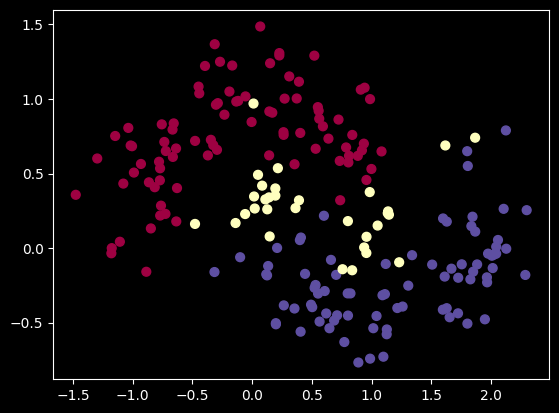

In [112]:
dataset = first_dataset
wrong = 0 # 1 - Number of wrong predictions
X = []    # 2 - Set containing the data samples
Y = []    # 3 - Set containing the predicted labels
for sample in dataset:
    # 4 - Add data sample to X
    X.append(sample[:-1])
    # 5 - Compute prediction y
    y_pred = predict(sample[:-1], weights)
    # 6 - Compute prediction error
    e = y_pred - sample[-1]
    if e != 0:  # error not equal to 0
        wrong += 1
        Y.append(0.5)  # mark misclassified with 0.5
    else:
        Y.append(y_pred)
X = np.array(X)
print('Number of mispredicted labels = %d' % wrong)
plt.clf()
plt.style.use('dark_background')
plt.scatter(X[:,0],X[:,1],s=40,c=Y,cmap=plt.cm.Spectral)



9 - Comparison with a linear logistic regression (with possible cross-validation) using `linear_model` module from sklearn

Text(0.5, 1.0, 'Logistic Regression')

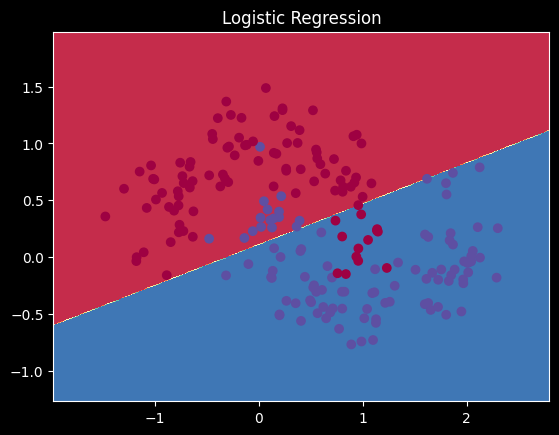

In [113]:
from sklearn import linear_model

X = dataset[:,:2]
Y = dataset[:,-1]

# 1 - Logistic regression classifier
classifier = linear_model.LogisticRegression()
classifier.fit(X, Y)

# 2 - Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plotDecisionBoundary(X,Y,pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

plotDecisionBoundary(X,Y,lambda x:classifier.predict(x))
plt.title("Logistic Regression")

